## Download video from YouTube

Using [pytube](https://python-pytube.readthedocs.io/en/latest/).

In [4]:
import pytube as pyt

In [12]:
poke_blue_vid = pyt.YouTube("https://www.youtube.com/watch?v=cWS76Wmu66M")
poke_silver_vid = pyt.YouTube("https://www.youtube.com/watch?v=O19yQvnFomQ")

In [37]:
print(f"Length of Pokemon Blue video: {poke_blue_vid.length} seconds")
print(f"Length of Pokemon Silver video: {poke_silver_vid.length} seconds")
print()
print(f"Rating of Pokemon Blue video: {poke_blue_vid.rating}")
print(f"Rating of Pokemon Silver video: {poke_silver_vid.rating}")
print()
print(f"Number of views on Pokemon Blue video: {poke_blue_vid.views}")
print(f"Number of views on Pokemon Silver video: {poke_silver_vid.views}")

Length of Pokemon Blue video: 24872 seconds
Length of Pokemon Silver video: 42883 seconds

Rating of Pokemon Blue video: 4.7677903
Rating of Pokemon Silver video: 4.7170525

Number of views on Pokemon Blue video: 123483
Number of views on Pokemon Silver video: 239349


In [31]:
# Query MPEG-4 format streams
print("Pokemon Blue video available streams:")
print("-------------------------------------")
for stream in poke_blue_vid.streams.filter(file_extension = "mp4"):
    print(stream)
    
print()

print("Pokemon Silver video available streams:")
print("-------------------------------------")
for stream in poke_silver_vid.streams.filter(file_extension = "mp4"):
    print(stream)

Pokemon Blue video available streams:
-------------------------------------
<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="133" mime_type="video/mp4" res="240p" fps="30fps" vcodec="avc1.4d400d" progressive="False" type="video">
<Stream: itag="160" mime_type="video/mp4" res="144p" fps="30fps" vcodec="avc1.4d400b" progressive="False" type="video">
<Stream: itag="140" mime_type="audio/mp4" abr="128kbps" acodec="mp4a.40.2" progressive="False" type="audio">

Pokemon Silver video available streams:
-------------------------------------
<Stream: itag="18" mime_type="video/mp4" res="360p" fps="30fps" vcodec="avc1.42001E" acodec="mp4a.40.2" progressive="True" type="video">
<Stream: itag="133" mime_type="video/mp4" res="240p" fps="30fps" vcodec="avc1.4d400d" progressive="False" type="video">
<Stream: itag="160" mime_type="video/mp4" res="144p" fps="30fps" vcodec="avc1.4d400b" progressive="Fal

In [42]:
# Download prefered videos
poke_blue_vid.streams.get_by_itag(18).download(output_path = "Videos/", filename = "PokemonBlue")
poke_silver_vid.streams.get_by_itag(18).download(output_path = "Videos/", filename = "PokemonSilver")

'/Users/cleonwong/Desktop/Code/Colouring-Pokemon/Videos/Pokemon_Silver.mp4'

## Extract frames from downloaded videos

Using [OpenCV](https://docs.opencv.org/2.4/index.html).

In [10]:
import cv2
import os
import math

In [35]:
def inspect_video(video_path, step):
    vidcap = cv2.VideoCapture(video_path)
    n_frames = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
    frame_rate = vidcap.get(cv2.CAP_PROP_FPS)
    frame_width = vidcap.get(cv2.CAP_PROP_FRAME_WIDTH)
    frame_height = vidcap.get(cv2.CAP_PROP_FRAME_HEIGHT)
    vid_length = n_frames / frame_rate
    image_count = math.floor(n_frames / step) + 1
    
    print(f"Video: {video_path}")
    print("------------------------------")
    print(f"Total video length: {vid_length} seconds")
    print(f"Frame width x height: {frame_width, frame_height}")
    print(f"Total number of frames in video: {n_frames}")
    print(f"Frames per second: {frame_rate}")
    print(f"Extracting every {step} frame.")
    print(f"Total number of images extracted: {image_count}")
    print()

def extract_frames(video_path, dest_path, saveas_filename, step, img_extension = '.jpg'):
    
    vidcap = cv2.VideoCapture(video_path)
    
    frame_count = 0 # Counts the frame that we are at.
    img_count = 0 # Counts the number of images saved.
    
    while vidcap.isOpened():
        
        success, image = vidcap.read()
        
        if success == False:
            break
        
        if frame_count % step == 0:
            img_filename = ''.join([saveas_filename, '_', str(img_count), img_extension])
            img_path = os.path.join(dest_path, img_filename)
            cv2.imwrite(img_path, image)
            img_count += 1
            
        frame_count += 1

        
    vidcap.release()
    cv2.destroyAllWindows()

In [36]:
inspect_video(video_path = "Videos/PokemonBlue.mp4", step = 900)
inspect_video(video_path = "Videos/PokemonSilver.mp4", step = 600)

Video: Videos/PokemonBlue.mp4
------------------------------
Total video length: 24871.38360567908 seconds
Frame width x height: (320.0, 288.0)
Total number of frames in video: 742759.0
Frames per second: 29.864
Extracting every 900 frame.
Total number of images extracted: 826

Video: Videos/PokemonSilver.mp4
------------------------------
Total video length: 42883.2 seconds
Frame width x height: (320.0, 288.0)
Total number of frames in video: 1286496.0
Frames per second: 30.0
Extracting every 600 frame.
Total number of images extracted: 2145



In [34]:
# Extract frames from Pokemon Blue
extract_frames(video_path = "Videos/PokemonBlue.mp4",
               dest_path = "Images/PokemonBlue/",
               saveas_filename = "PokemonBlue",
               step = 900,
               img_extension = '.jpg')

# Extract frames from Pokemon Silver
extract_frames(video_path = "Videos/PokemonSilver.mp4",
               dest_path = "Images/PokemonSilver/",
               saveas_filename = "PokemonSilver",
               step = 600,
               img_extension = '.jpg')

## Display image

In [53]:
import matplotlib.pyplot as plt

In [57]:
def display_img(img_path, title):
    image = cv2.imread(img_path)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) # OpenCV represents RGB images in BGR order rather than RGB.
    plt.title(label = title)
    plt.show()

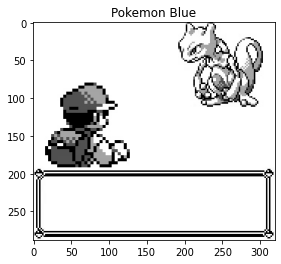

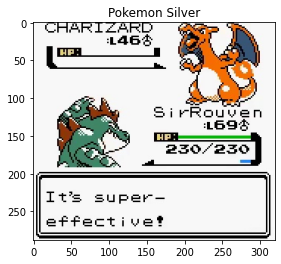

In [56]:
display_img(img_path = "Images/PokemonBlue/PokemonBlue_824.jpg",
            title = "Pokemon Blue")

display_img(img_path = "Images/PokemonSilver/PokemonSilver_2122.jpg",
            title = "Pokemon Silver")